# K-Nearest Neighbours Model
## Daha önce elde edilen noktalara bakarak yeni bir nokta geldiği zaman, onun hangi grupta olduğunu bulmak için kullanılır

 ## en yakındaki K tane komşu noktaya bakar ve grubunu bularak hareket eder

#


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# train test' içerdiği için bu kütüphaneyi,
from sklearn.model_selection import train_test_split
#KNN'i içerdiği için bu kütüphaneyi içe aktarıyoruz
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("diabetes.csv")
data.head(25)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### outcome >>> 1-hasta | 0-sağlıklı

### sağlıklı ve hastalıklı insanların tablosunu incelemek için 2 ayrı veri seti oluşturuyoruz

In [3]:
sekerHastasiInsanlar = data[data.Outcome == 1]
saglikliInsanlar = data[data.Outcome == 0]

### glikoz ve yaş arasındaki durumu inceliyoruz

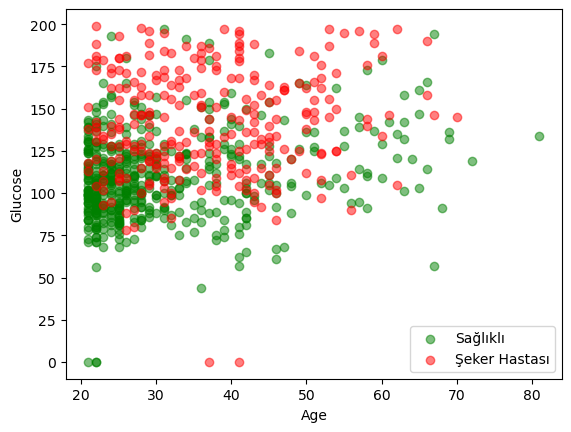

In [4]:
plt.scatter(saglikliInsanlar.Age , saglikliInsanlar.Glucose , color = "green" , label = "Sağlıklı" , alpha = 0.5)
plt.scatter(sekerHastasiInsanlar.Age , sekerHastasiInsanlar.Glucose , color = "red" , label = "Şeker Hastası" , alpha = 0.5)

plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

## Model eğitimi aşaması için;

### X ve Y eksenlerini belirliyoruz

In [5]:
y = data.Outcome.values
# y sadece outcome sütunu olarak alıyoruz
xHamVeri =  data.drop(["Outcome"],axis = 1)
#x ise datadaki bağımlı değişken (outcome) hariç tüm independent(bağımsız) dataları tutacak şekilde alıyoruz

## Normalization
### Datadaki yüksek sayılar(200-300 vs.) küçük sayıları (0,67-0,40 vs) ezebilir ve KNN algoritmasını yanıltabilir. Bu yüzden normalization yaparak değeleri 0 ve 1 arasında olacak şekilde yeniden ayarlarız

In [6]:
x = (xHamVeri - np.min(xHamVeri, axis = 0)) / (np.max(xHamVeri , axis = 0) - np.min(xHamVeri , axis = 0))

print("normalization öncesi ham veriler ;\n")
print(xHamVeri.head())

print("\n\n")

print("normalization sonrası veriler ;\n")
print(x.head())


normalization öncesi ham veriler ;

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



normalization sonrası veriler ;

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000

## bu işlemle, tüm independent değişkenleri aynı ağırlığa getirdik

#


## Train Data ile Test Data'nın ayrılması ;

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(x , y , test_size = 0.1 , random_state = 1 )

### train_test_split( independent dğşk.ler , dependent değişken , test size = test data boyutu , random seçme = 1)

#

## KNN Modelinin oluşturulması ;

### Modelin eğitimi

In [8]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k degeri
knn.fit(xTrain , yTrain)

KNeighborsClassifier(n_neighbors=3)

### Modelin prediction aşaması

In [9]:
prediction = knn.predict(xTest)
print("k = 3 için Test verilerimiz doğrulama testi sonucu")
print(knn.score(xTest, yTest))

k = 3 için Test verilerimiz doğrulama testi sonucu
0.8311688311688312


### Key değerlerine göre modelin incelenmesi

In [10]:
for k in range(1,11):
    knnNew = KNeighborsClassifier(n_neighbors = k)
    knnNew.fit(xTrain , yTrain)
    print(k,"komşu için Doğruluk Oranı : %",knnNew.score(xTest,yTest)*100) 

1 komşu için Doğruluk Oranı : % 71.42857142857143
2 komşu için Doğruluk Oranı : % 71.42857142857143
3 komşu için Doğruluk Oranı : % 83.11688311688312
4 komşu için Doğruluk Oranı : % 80.51948051948052
5 komşu için Doğruluk Oranı : % 81.81818181818183
6 komşu için Doğruluk Oranı : % 83.11688311688312
7 komşu için Doğruluk Oranı : % 80.51948051948052
8 komşu için Doğruluk Oranı : % 80.51948051948052
9 komşu için Doğruluk Oranı : % 79.22077922077922
10 komşu için Doğruluk Oranı : % 79.22077922077922


## QUIZ

In [11]:
knnNew = KNeighborsClassifier(n_neighbors = 3)
knnNew.fit(xTrain , yTrain)

KNeighborsClassifier(n_neighbors=3)

In [14]:
nmpar = np.array([[2,87,58,26,16,28.4,0.766,22],
               [0,122,72,1,1,36.3,0.258,52]])

xYeniKisilerHamVeri = pd.DataFrame(nmpar , columns=xHamVeri.columns)
# yeni kişiler olarak oluşturduğumuz matrisi data frame'e çeviriyoruz

xYeniKisilerNormalizeEdilmis = (xYeniKisilerHamVeri - np.min(xHamVeri, axis = 0)) / (np.max(xHamVeri , axis = 0) - np.min(xHamVeri , axis = 0))
# yeni kişiler dataframe'ini normalize ediyoruz

predictionYeniKisiler = knn.predict(xYeniKisilerNormalizeEdilmis)
print(predictionYeniKisiler)

[0 1]


In [13]:
bahtigul = [[4,81.4,66,0,0,33.2,0,42]]
xBahtigulHamVeri = pd.DataFrame(bahtigul , columns=xHamVeri.columns)
xBahtigulNormalizeEdilmis = (xBahtigulHamVeri - np.min(xHamVeri, axis = 0)) / (np.max(xHamVeri , axis = 0) - np.min(xHamVeri , axis = 0))
predictionYeniKisiler = knn.predict(xBahtigulNormalizeEdilmis)
print(predictionYeniKisiler)

[0]
